## 13b - Crime stats with a library



In [5]:
## datlib is a library with its own namespace
from Quizzes_Assignments_Exams import datlib
## access objects 
## datlib.clean_dat

## when you run datlib it is executing in os.getcwd()
import os
print(os.getcwd())

/home/user/mp248-course-notes


In [3]:
from Quizzes_Assignments_Exams.datlib import clean_dat

In [4]:
clean_dat[0]

{'latitude': 48.4255680718449,
 'longitude': -123.348998693722,
 'parent_incident_type': 'Disorder',
 'incident_type_primary': 'CAUSE A DISTURBANCE',
 'address_1': '1200 Block JOHNSON ST',
 'address_2': None,
 'case_number': [16, 22918],
 'incident_id': 760527874,
 'created_at': datetime.datetime(2016, 5, 26, 9, 46, 43),
 'updated_at': datetime.datetime(2016, 6, 23, 19, 40, 33),
 'incident_datetime': datetime.datetime(2016, 5, 25, 1, 29)}

Let's do some basic analysis of the data.

1) Which crime reports are the most common? **check**

2) When do the crimes happen?

3) Where do they occur? Last week's lab wrt Bay Centre partially addresses this. 

4) What relations are there between the crime types?  Crime and weather data (today's lab concerns this question)


127668


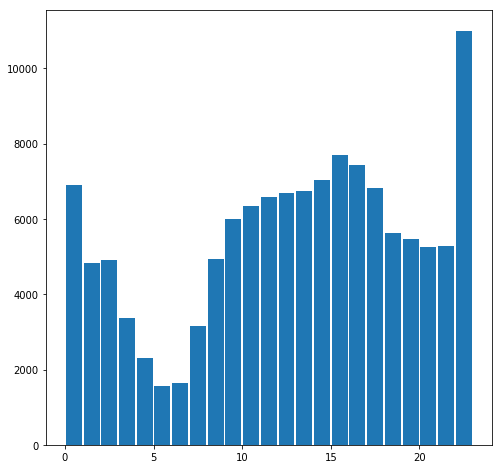

In [11]:
## (2) When do the crimes occur
##  We could address this with a histogram where we "bin" the
##  crime types by the hour of the day they occur. 24 bins. 
#    floatkeys = ['latitude', 'longitude']
#    strkeys = ['parent_incident_type', 'incident_type_primary', 'address_1', 'address_2']
#    intkeys = ['case_number', 'incident_id']
#    datekeys = ['created_at', 'updated_at', 'incident_datetime']
import matplotlib.pyplot as plt
%matplotlib inline

## first let's just deal with all the crimes
HOD = [x['incident_datetime'].hour for x in clean_dat]
print(len(HOD))
plt.figure(figsize=(8,8))
A = plt.hist(HOD, rwidth=0.9, bins=[i for i in range(24)])

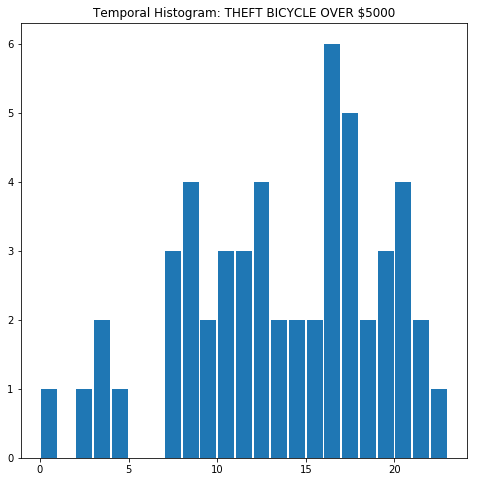

In [18]:
## adjust above code for individual crime types

## plot a histogram of all crimes of type incident_type_primary == itp
def crime_hist(itp):
    HOD = [x['incident_datetime'].hour for x in clean_dat\
           if x['incident_type_primary']==itp]
    plt.figure(figsize=(8,8))
    plt.title('Temporal Histogram: '+itp)
    A = plt.hist(HOD, rwidth=0.9, bins=[i for i in range(24)])
    
crime_hist('THEFT BICYCLE OVER $5000')

In [14]:
import pprint as pp
pp.pprint(datlib.ctree)

{'Alarm': defaultdict(<class 'int'>, {'FALSE ALARMS': 1447}),
 'Arson': defaultdict(<class 'int'>,
                      {'ARSON-DISREGARD FOR HUMAN LIFE': 22,
                       'ARSON-PROPERTY': 260}),
 'Assault': defaultdict(<class 'int'>,
                        {'ASSAULT AGAINST POLICE OFFICER': 417,
                         'ASSAULT-COMMON OR TRESPASS': 2065,
                         'ASSAULTS-OTHER': 473}),
 'Assault with Deadly Weapon': defaultdict(<class 'int'>,
                                           {'ASSAULT OT P/O-W/WPN OR CBH': 38,
                                            'ASSAULT POLICE-W/WEAPON OR CBH': 75,
                                            'ASSAULT-AGGRAVATED': 98,
                                            'ASSAULT-OTHER PEACE OFFICER': 125,
                                            'ASSAULT-W/WEAPON OR CBH': 1552}),
 'Breaking & Entering': defaultdict(<class 'int'>,
                                    {'BREAK & ENTER-BUSINESS': 1691,
          

In [35]:
import cmath as cm

## We observed for most crime types there is a typical time for them
## let's write code to find the average time of day of occurance.

## to do this we will represent the time as on the unit circle i.e. 24 hours
## will correspond to 2*Pi. 

## we will take the average of these coordinates in R^2, taking the unit vector
## as the "average" and the length of this vector as some measure of the 
## "variance"

#datetime.replace(year=self.year, month=self.month, day=self.day, 
# hour=self.hour, minute=self.minute, second=self.second, microsecond=self.microsecond, tzinfo=self.tzinfo, * fold=0)¶

def crime_daily_time_avg(itp):
    TSM = []
    for x in clean_dat:
        if x['incident_type_primary']==itp:
            midnight = x['incident_datetime'].replace(hour=0, minute=0,\
                                                          second=0, microsecond=0)
            tsm = x['incident_datetime'] - midnight
            TSM.append(tsm)
    TOUS = []
    for x in TSM:
        tous = cm.rect( 1.0, x.seconds*2*cm.pi / (60*60*24) )
        TOUS.append(tous)
    avg = sum(TOUS) / len(TOUS)
    ## polar returns pair (r, angle)
    plr = cm.polar(avg)
    ## angle is between -pi and pi.
    ti = plr[1]*24/(2*cm.pi)
    ti = ti % 24
    return(plr[0], ti)

In [40]:
import operator as op

avgti = []
for k,v in datlib.ctree.items():
    for w in v.keys():
        #print(w)
        if w=='CITIZEN ASSIST':
            continue
        avgti.append( (w, *crime_daily_time_avg(w) ) )

In [42]:
avgti = sorted( avgti, key=op.itemgetter(1) )

In [43]:
pp.pprint(avgti)

[('WEAPONS POSS-CONTRARY TO ORDER', 0.08518855398875698, 15.72103944527582),
 ('ASSAULT-OTHER PEACE OFFICER', 0.15532614825358687, 19.12471785837786),
 ('POSSESS-OTH SCHED III DRUG/SUB', 0.17118001703198482, 23.025878579853657),
 ('POSSESS-OTH SCHED I DRUGS/SUBS', 0.17560197188544013, 17.2280948883448),
 ('POSSESSION-METHAMPHETAMINE', 0.1789142799893162, 17.443727840592615),
 ('SUSPICIOUS PERS/VEH/OCCURRENCE', 0.1794573170544679, 17.483635847218032),
 ('ASSAULT-AGGRAVATED', 0.194380289933686, 23.45682113540749),
 ('OBSTRUCT PEACE/PUBLIC OFFICER', 0.19442268051213288, 0.048190355746602014),
 ('ASSAULT-W/WEAPON OR CBH', 0.1947211776137087, 21.523070981857803),
 ('EXCESSIVE SPEED-OVER 40KM', 0.20049887970308272, 20.60343374596373),
 ('POSSESSION-COCAINE', 0.20060276704374363, 18.453412998003405),
 ('ASSAULT POLICE-W/WEAPON OR CBH', 0.2087383149719908, 22.208363351222083),
 ('WEAPONS-POSSESSION', 0.20924113623389798, 16.909183645998233),
 ('MISCHIEF $5000 OR UNDER', 0.21980485231895205, 12